In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
data = pd.read_csv("/content/twitter_dataset.csv")

In [ ]:
#you can customize this list according to you
offensive_words = ["bitches" , "fuck" , "hell" , "bad" , "awful" , "losers" , "smoke" , "nigga" , "hate" , "shit" ,"hoe"]

<Axes: xlabel='offensive_language', ylabel='count'>

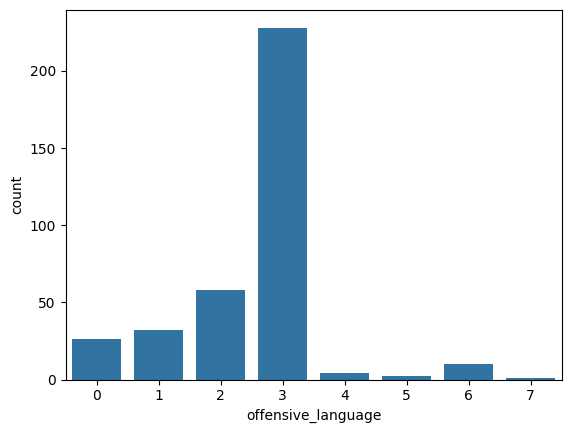

In [ ]:
sns.countplot(x = "offensive_language" , data = data)

<Axes: xlabel='hate_speech', ylabel='count'>

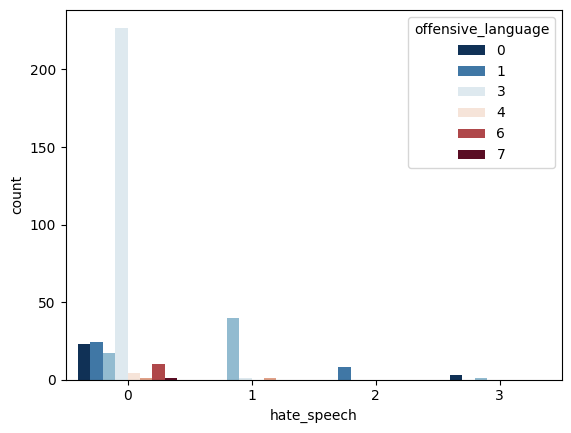

In [ ]:
sns.countplot(x = "hate_speech",hue ="offensive_language", data = data , palette="RdBu_r")

In [ ]:
data.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,182.091413,3.152355,0.193906,2.562327,0.396122,1.096953
std,106.008464,0.667958,0.517544,1.141208,0.910364,0.393018
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,182.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,273.000000,3.000000,0.000000,3.000000,0.000000,1.000000
max,365.000000,9.000000,3.000000,7.000000,6.000000,2.000000


In [ ]:
print("First five records of the given dataset:")
data.head()

First five records of the given dataset:


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


CORR is used to find the correlation between two entities and heat map is used if two entities are related to each other or not

In [ ]:
import seaborn as sns
print(data.corr())
sns.heatmap(data.corr())

ValueError: could not convert string to float: "!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [ ]:
print("This is the list of the restricted users : ")
tfidf_vectorizer = TfidfVectorizer(stop_words= "english")
tfid_matrix = tfidf_vectorizer.fit_transform(offensive_words)
softmax_scores_list =[]
for statement in data["tweet"]:
    statement_vector = tfidf_vectorizer.transform([statement])
    offensive_prob = np.dot(statement_vector , tfid_matrix).toarray()
    softmax_scores = np.exp(offensive_prob) / np.sum(np.exp(offensive_prob), axis=1, keepdims=True)
    #print(f"Statement: {statement } , softmax_scores : {np.max(softmax_scores)}")
    if np.max(softmax_scores) >= 0.1:
        parts = statement.split()
        for part in parts:
            if part.startswith("@") and part.endswith(":"):
                restricted_user = part[1: -1]
                print(f"{restricted_user}")


This is the list of the restricted users : 
mleew17
80sbaby4life
ShenikaRoberts
bluprint_4
